In [126]:
import os
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, classification_report, accuracy_score, confusion_matrix, log_loss
from sklearn.cluster import KMeans, k_means
from math import sqrt

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

%matplotlib inline

In [127]:
rev_data = pd.read_csv('C:\\Users\ASHE\\Desktop\\Ashe Git Project\\Rev Data.csv')
rev_data 

,Date,Day_Name,Customers,Revenue
0,9/11/2020,Monday,707,5211
1,10/11/2020,Tuesday,1455,10386
2,11/11/2020,Wednesday,1520,12475
3,12/11/2020,Thursday,1726,14414
4,13/11/2020,Friday,2134,20916
...,...,...,...,...
114,3/3/2021,Wednesday,1068,8223
115,4/3/2021,Thursday,1976,16727
116,5/3/2021,Friday,1806,15474
117,6/3/2021,Saturday,1621,12850


In [128]:
ad_data = pd.read_csv('C:\\Users\ASHE\\Desktop\\Ashe Git Project\\Ad Spend.csv')
ad_data

,Date,Ad Spend,Promo Campaign
0,22/12/2020,1024.500000,Promotion Red
1,23/12/2020,1181.700000,Promotion Blue
2,24/12/2020,1955.000000,No Promo
3,25/12/2020,2336.777778,Promotion Blue
4,26/12/2020,4535.375000,Promotion Blue
...,...,...,...
119,5/5/2021,1119.600000,No Promo
120,6/5/2021,2067.888889,Promotion Red
121,7/5/2021,1450.200000,No Promo
122,8/5/2021,1121.875000,No Promo


In [129]:
raw_data = pd.merge(rev_data, ad_data, how = 'left', on = 'Date')

In [130]:
raw_data

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
0,9/11/2020,Monday,707,5211,NaN,NaN
1,10/11/2020,Tuesday,1455,10386,NaN,NaN
2,11/11/2020,Wednesday,1520,12475,NaN,NaN
3,12/11/2020,Thursday,1726,14414,NaN,NaN
4,13/11/2020,Friday,2134,20916,NaN,NaN
...,...,...,...,...,...,...
114,3/3/2021,Wednesday,1068,8223,822.300000,Promotion Red
115,4/3/2021,Thursday,1976,16727,1672.700000,Promotion Blue
116,5/3/2021,Friday,1806,15474,1719.333333,Promotion Blue
117,6/3/2021,Saturday,1621,12850,1427.777778,Promotion Blue


In [131]:
raw_data.isnull().sum()

Date               0
Day_Name           0
Customers          0
Revenue            0
Ad Spend          51
Promo Campaign    51
dtype: int64

In [132]:
raw_data['Ad Spend'] = raw_data['Ad Spend'].fillna(np.mean(raw_data['Ad Spend']))
raw_data['Promo Campaign'] = raw_data['Promo Campaign'].fillna('No Promo')

In [133]:
raw_data

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
0,9/11/2020,Monday,707,5211,1354.933616,No Promo
1,10/11/2020,Tuesday,1455,10386,1354.933616,No Promo
2,11/11/2020,Wednesday,1520,12475,1354.933616,No Promo
3,12/11/2020,Thursday,1726,14414,1354.933616,No Promo
4,13/11/2020,Friday,2134,20916,1354.933616,No Promo
...,...,...,...,...,...,...
114,3/3/2021,Wednesday,1068,8223,822.300000,Promotion Red
115,4/3/2021,Thursday,1976,16727,1672.700000,Promotion Blue
116,5/3/2021,Friday,1806,15474,1719.333333,Promotion Blue
117,6/3/2021,Saturday,1621,12850,1427.777778,Promotion Blue


In [134]:
raw_data[raw_data['Revenue'].isnull()]

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign


In [135]:
raw_data['Date']

0       9/11/2020
1      10/11/2020
2      11/11/2020
3      12/11/2020
4      13/11/2020
          ...    
114      3/3/2021
115      4/3/2021
116      5/3/2021
117      6/3/2021
118      7/3/2021
Name: Date, Length: 119, dtype: object

In [136]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format = '%d/%m/%Y')

In [137]:
raw_data

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
0,2020-11-09,Monday,707,5211,1354.933616,No Promo
1,2020-11-10,Tuesday,1455,10386,1354.933616,No Promo
2,2020-11-11,Wednesday,1520,12475,1354.933616,No Promo
3,2020-11-12,Thursday,1726,14414,1354.933616,No Promo
4,2020-11-13,Friday,2134,20916,1354.933616,No Promo
...,...,...,...,...,...,...
114,2021-03-03,Wednesday,1068,8223,822.300000,Promotion Red
115,2021-03-04,Thursday,1976,16727,1672.700000,Promotion Blue
116,2021-03-05,Friday,1806,15474,1719.333333,Promotion Blue
117,2021-03-06,Saturday,1621,12850,1427.777778,Promotion Blue


In [138]:
for column in raw_data:
    unique_values = np.unique(raw_data[column])
    no_of_values = len(unique_values)
    if no_of_values <= 10:
        print('The number of values of the feature {} is: {} -- {}'.format(column, no_of_values, unique_values))
    else:
        print('The number of values of the feature {} is: {}'.format(column, no_of_values))

The number of values of the feature Date is: 119
The number of values of the feature Day_Name is: 7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values of the feature Customers is: 118
The number of values of the feature Revenue is: 119
The number of values of the feature Ad Spend is: 69
The number of values of the feature Promo Campaign is: 3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


In [139]:
raw_data.columns 

Index(['Date', 'Day_Name', 'Customers', 'Revenue', 'Ad Spend',
       'Promo Campaign'],
      dtype='object')

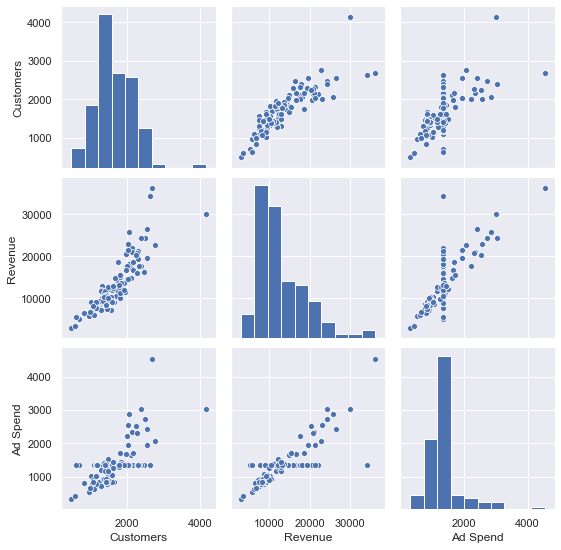

In [140]:
sns.pairplot(raw_data)

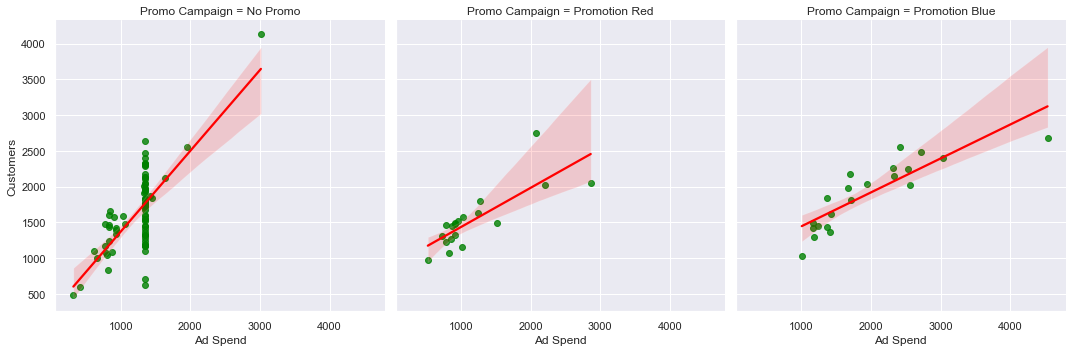

In [141]:
sns.lmplot(x = 'Ad Spend', y = 'Customers', data = raw_data, col = 'Promo Campaign', line_kws = {'color':'red'}, scatter_kws = {'color':'green'})

In [142]:
#To remove the outlier(extreme values for Ad Spend)

raw_data[raw_data['Ad Spend']  > 4000]

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
47,2020-12-26,Saturday,2678,36283,4535.375,Promotion Blue


In [143]:
raw_data = raw_data[raw_data['Ad Spend']  < 4000]

In [144]:
raw_data.head()

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
0,2020-11-09,Monday,707,5211,1354.933616,No Promo
1,2020-11-10,Tuesday,1455,10386,1354.933616,No Promo
2,2020-11-11,Wednesday,1520,12475,1354.933616,No Promo
3,2020-11-12,Thursday,1726,14414,1354.933616,No Promo
4,2020-11-13,Friday,2134,20916,1354.933616,No Promo


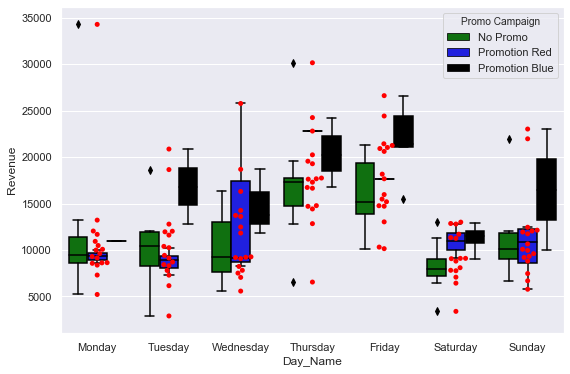

In [145]:
sns.set(rc={'figure.figsize':(9,6)})
col = ['green', 'blue', 'black']
sns.boxplot(x = 'Day_Name', y = 'Revenue', data = raw_data, hue = 'Promo Campaign', palette = col)
sns.swarmplot(x = 'Day_Name', y = 'Revenue', data = raw_data, color = 'red')

In [146]:
raw_data[raw_data['Revenue'] > 28000]

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
14,2020-11-23,Monday,2632,34278,1354.933616,No Promo
59,2021-01-07,Thursday,4139,30146,3014.600000,No Promo


In [147]:
raw_data = raw_data[raw_data['Revenue'] < 28000]

In [148]:
raw_data.shape

(116, 6)

In [149]:
raw_data.columns

Index(['Date', 'Day_Name', 'Customers', 'Revenue', 'Ad Spend',
       'Promo Campaign'],
      dtype='object')

In [150]:
new_raw_data = raw_data[['Day_Name', 'Customers', 'Revenue', 'Ad Spend',
       'Promo Campaign']]

In [151]:
new_raw_data

,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
0,Monday,707,5211,1354.933616,No Promo
1,Tuesday,1455,10386,1354.933616,No Promo
2,Wednesday,1520,12475,1354.933616,No Promo
3,Thursday,1726,14414,1354.933616,No Promo
4,Friday,2134,20916,1354.933616,No Promo
...,...,...,...,...,...
114,Wednesday,1068,8223,822.300000,Promotion Red
115,Thursday,1976,16727,1672.700000,Promotion Blue
116,Friday,1806,15474,1719.333333,Promotion Blue
117,Saturday,1621,12850,1427.777778,Promotion Blue


In [152]:
#to create dummy variables for the strings
new_raw_data = pd.get_dummies(new_raw_data, columns = ['Day_Name', 'Promo Campaign'])

In [153]:
new_raw_data

,Customers,Revenue,Ad Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo Campaign_No Promo,Promo Campaign_Promotion Blue,Promo Campaign_Promotion Red
0,707,5211,1354.933616,0,1,0,0,0,0,0,1,0,0
1,1455,10386,1354.933616,0,0,0,0,0,1,0,1,0,0
2,1520,12475,1354.933616,0,0,0,0,0,0,1,1,0,0
3,1726,14414,1354.933616,0,0,0,0,1,0,0,1,0,0
4,2134,20916,1354.933616,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1068,8223,822.300000,0,0,0,0,0,0,1,0,0,1
115,1976,16727,1672.700000,0,0,0,0,1,0,0,0,1,0
116,1806,15474,1719.333333,1,0,0,0,0,0,0,0,1,0
117,1621,12850,1427.777778,0,0,1,0,0,0,0,0,1,0


In [172]:
X = new_raw_data.drop('Revenue', axis = 1).values
X2 = new_raw_data.drop('Revenue', axis = 1)
y = new_raw_data['Revenue']

In [155]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 15, criterion = 'entropy', max_depth = 10)
dt.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [156]:
dt_column = []
dt_vals = []

for i, column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The value of calculated importance of feature {} is: {:.3f}'.format(column, dt.feature_importances_[i]))
    
    dt_column.append(column)
    dt_vals.append(dt.feature_importances_[i])

The value of calculated importance of feature Customers is: 0.692
The value of calculated importance of feature Ad Spend is: 0.139
The value of calculated importance of feature Day_Name_Friday is: 0.038
The value of calculated importance of feature Day_Name_Monday is: 0.011
The value of calculated importance of feature Day_Name_Saturday is: 0.018
The value of calculated importance of feature Day_Name_Sunday is: 0.010
The value of calculated importance of feature Day_Name_Thursday is: 0.021
The value of calculated importance of feature Day_Name_Tuesday is: 0.015
The value of calculated importance of feature Day_Name_Wednesday is: 0.008
The value of calculated importance of feature Promo Campaign_No Promo is: 0.019
The value of calculated importance of feature Promo Campaign_Promotion Blue is: 0.015
The value of calculated importance of feature Promo Campaign_Promotion Red is: 0.013


In [157]:
dt_df = zip(dt_column, dt_vals)
dt_dff = pd.DataFrame(dt_df, columns = ['Feature', 'feature importances'])
dt_dff.sort_values(by = 'feature importances', ascending = False).reset_index()

,index,Feature,feature importances
0,0,Customers,0.692417
1,1,Ad Spend,0.139473
2,2,Day_Name_Friday,0.037520
3,6,Day_Name_Thursday,0.021309
4,9,Promo Campaign_No Promo,0.018880
5,4,Day_Name_Saturday,0.017598
6,7,Day_Name_Tuesday,0.015084
7,10,Promo Campaign_Promotion Blue,0.015084
8,11,Promo Campaign_Promotion Red,0.012903
9,3,Day_Name_Monday,0.011183


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92, 12)
(24, 12)
(92,)
(24,)


In [162]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
y_pred_t = lm.predict(X_test)

In [168]:
print('The CA of the training data is:', lm.score(X_train, y_train))
print('The CA of the training data is:', r2_score(y_train, y_pred))
print('')
print('The CA of the testing data is:', lm.score(X_test, y_test))
print('')
print('The MAE of the training data is', mean_absolute_error(y_train, y_pred))
print('The MAE of the testing data is', mean_absolute_error(y_test, y_pred_t))
print('')
print('The MSE of the training data is', sqrt(mean_squared_error(y_train, y_pred)))
print('The MSE of the testing data is', sqrt(mean_squared_error(y_test, y_pred_t)))
print('')
print('The coefficients are:', lm.coef_)
print('')
print('The intercept is:', lm.intercept_)

The CA of the training data is: 0.8962689024284354
The CA of the training data is: 0.8962689024284354

The CA of the testing data is: 0.8850741503983044

The MAE of the training data is 1249.3830936336362
The MAE of the testing data is 1210.928821694242

The MSE of the training data is 1651.841933321317
The MSE of the testing data is 1688.026244538011

The coefficients are: [6.279722 3.651721 1781.827936 -1353.232096 -269.882564 -334.199418
 357.762970 -360.366356 178.089527 -506.302724 374.019702 132.283022]

The intercept is: -2285.6472126952103


Text(0, 0.5, 'Prediction')

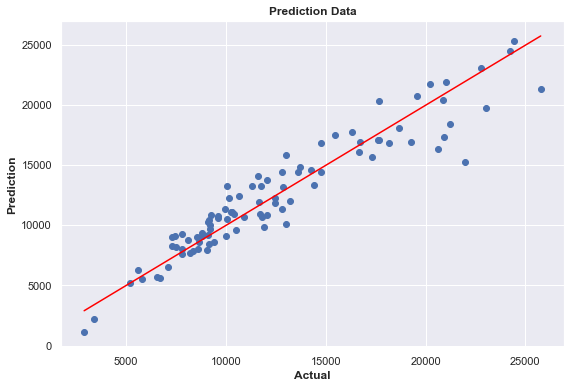

In [186]:
plt.scatter(y_train, y_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color = 'red')
plt.title('Prediction Data', fontweight = 'bold')
plt.xlabel('Actual', fontweight = 'bold')
plt.ylabel('Prediction', fontweight = 'bold')

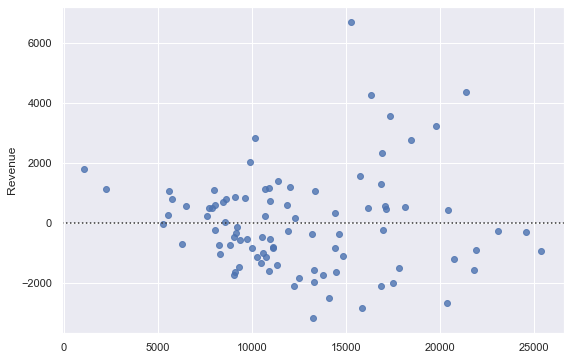

In [184]:
sns.residplot(y_pred, y_train)

In [169]:
coeff = lm.coef_

In [174]:
coeff = coeff.reshape(-1,12)

In [175]:
X2.columns

Index(['Customers', 'Ad Spend', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Promo Campaign_No Promo',
       'Promo Campaign_Promotion Blue', 'Promo Campaign_Promotion Red'],
      dtype='object')

In [176]:
coeff_df = pd.DataFrame(coeff, columns = [X2.columns])
coeff_df

,Customers,Ad Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo Campaign_No Promo,Promo Campaign_Promotion Blue,Promo Campaign_Promotion Red
0,6.279722,3.651721,1781.827936,-1353.232096,-269.882564,-334.199418,357.76297,-360.366356,178.089527,-506.302724,374.019702,132.283022


In [193]:
Customers = 1629.155172413793
Ad_Spend = 1313.2085485871955
Day = 'Day_Name_Friday'
Promo = 'Promo Campaign_Promotion Blue'

#y = a+bx

predicted_value = (lm.intercept_) + (coeff_df[[Day]].values[0] * 1) + (coeff_df[['Customers']].values[0] * Customers) + (coeff_df[['Ad Spend']].values[0] * Ad_Spend) + (coeff_df[[Promo]].values[0] * 1)
print('The estimated Revenue is:', predicted_value)

The estimated Revenue is: [14896.312585]


In [190]:
raw_data[raw_data['Day_Name'] == 'Friday']

,Date,Day_Name,Customers,Revenue,Ad Spend,Promo Campaign
4,2020-11-13,Friday,2134,20916,1354.933616,No Promo
11,2020-11-20,Friday,1819,15188,1354.933616,No Promo
18,2020-11-27,Friday,1671,14760,1354.933616,No Promo
25,2020-12-04,Friday,1975,20607,1354.933616,No Promo
32,2020-12-11,Friday,1322,10140,1354.933616,No Promo
39,2020-12-18,Friday,2056,18161,1354.933616,No Promo
46,2020-12-25,Friday,2152,21031,2336.777778,Promotion Blue
53,2021-01-01,Friday,2032,21428,1948.000000,Promotion Blue
60,2021-01-08,Friday,2286,15962,1354.933616,No Promo
67,2021-01-15,Friday,2312,21245,1354.933616,No Promo


In [191]:
raw_data[raw_data['Day_Name'] == 'Friday'].groupby('Promo Campaign', as_index = False).agg({'Revenue':'mean'})

,Promo Campaign,Revenue
0,No Promo,15910.818182
1,Promotion Blue,21791.600000
2,Promotion Red,17661.000000


In [192]:
print(np.mean(raw_data['Customers']))
print(np.mean(raw_data['Ad Spend']))

1629.155172413793
1313.2085485871955


In [12]:
raw_data.isnull().sum()

Date                 0
Day_Name             0
Customers            0
Revenue              0
Marketing Spend    138
Promo              138
dtype: int64

In [17]:
raa_data = pd.read_csv('C:\\Users\ASHE\\Desktop\\Ashe Git Project\\raa.csv')
raa_data 
maa_data = pd.read_csv('C:\\Users\ASHE\\Desktop\\Ashe Git Project\\maa.csv')
maa_data 

,Date,Marketing Spend,Promo
0,22/12/2020,1024.500000,Promotion Red
1,23/12/2020,1181.700000,Promotion Blue
2,24/12/2020,1955.000000,No Promo
3,25/12/2020,2336.777778,Promotion Blue
4,26/12/2020,4535.375000,Promotion Blue
...,...,...,...
244,3/5/2022,2285.000000,Promotion Red
245,4/5/2022,2344.000000,No Promo
246,5/5/2022,2329.000000,No Promo
247,6/5/2022,905.000000,No Promo


In [25]:
mmaa = pd.merge(maa_data, raa_data, how = 'left', on = 'Date')
mmaa.sort_values(by = 'Date', ascending = True).reset_index()

,index,Date,Marketing Spend,Promo,Day_Name,Customers,Revenue
0,176,1/1/2021,1697.000000,Promotion Blue,Monday,1737.0,27463.0
1,9,1/1/2021,1948.000000,Promotion Blue,Wednesday,1362.0,9067.0
2,10,1/1/2021,1948.000000,Promotion Blue,Monday,1737.0,27463.0
3,175,1/1/2021,1697.000000,Promotion Blue,Wednesday,1362.0,9067.0
4,286,1/4/2021,1961.000000,Promotion Blue,Saturday,1488.0,9095.0
...,...,...,...,...,...,...,...
328,300,9/4/2021,2047.000000,Promotion Blue,Saturday,599.0,3392.0
329,301,9/4/2021,2047.000000,Promotion Blue,Thursday,1467.0,17027.0
330,135,9/4/2021,2652.222222,Promotion Blue,Thursday,1467.0,17027.0
331,134,9/4/2021,2652.222222,Promotion Blue,Saturday,599.0,3392.0


In [30]:
mmaa['Revenue'].isnull().sum()

13

In [17]:
pd.set_option('display.max_rows', 10)

In [14]:
raw_data

,Date_ID,Day_Name,Customers,Revenue,Advert Spend,Promo
0,9/11/2020,Monday,707,5211,NaN,NaN
1,10/11/2020,Tuesday,1455,10386,NaN,NaN
2,11/11/2020,Wednesday,1520,12475,NaN,NaN
3,12/11/2020,Thursday,1726,14414,NaN,NaN
4,13/11/2020,Friday,2134,20916,NaN,NaN
5,14/11/2020,Saturday,1316,12996,NaN,NaN
6,15/11/2020,Sunday,1287,11929,NaN,NaN
7,16/11/2020,Monday,1548,10072,NaN,NaN
8,17/11/2020,Tuesday,1448,12016,NaN,NaN
9,18/11/2020,Wednesday,1362,9067,NaN,NaN
